# BT4012 Project: Model Building, Tuning, and Evaluation
### Completed by: Group 8

# Import Packages

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

# Initialize the evaluator
from model_evaluator import ModelEvaluator
evaluator = ModelEvaluator()

# Global Variables
RANDOM_STATE = 42

# Load Datasets & Basic EDA

#### Train set

In [21]:
train_df = pd.read_csv('../data/processed/train.csv')
train_df.head()

,trans_timeofday_morning,trans_timeofday_night,amt,dist_from_last_trans,merchant,time_since_last_trans,trans_hour,trans_isworkhours,transaction_velocity,is_fraud
0,0.0,1.0,0.000011,0.214939,0.002540,0.004717,1.000000,0,8.558783e-06,0
1,0.0,0.0,0.000508,0.579818,0.002287,0.016741,0.652174,1,6.505197e-06,0
2,0.0,0.0,0.000631,0.534537,0.001380,0.026992,0.695652,1,3.719519e-06,0
3,1.0,0.0,0.005356,0.242022,0.001711,0.089617,0.434783,1,5.072255e-07,0
4,1.0,0.0,0.014015,0.671043,0.003447,0.004334,0.347826,1,2.908067e-05,0


In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232668 entries, 0 to 232667
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   trans_timeofday_morning  232668 non-null  float64
 1   trans_timeofday_night    232668 non-null  float64
 2   amt                      232668 non-null  float64
 3   dist_from_last_trans     232668 non-null  float64
 4   merchant                 232668 non-null  float64
 5   time_since_last_trans    232668 non-null  float64
 6   trans_hour               232668 non-null  float64
 7   trans_isworkhours        232668 non-null  int64  
 8   transaction_velocity     232668 non-null  float64
 9   is_fraud                 232668 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 17.8 MB


#### Validation set

In [23]:
validation_df = pd.read_csv('../data/processed/validation.csv')
validation_df.head()

,trans_timeofday_morning,trans_timeofday_night,amt,dist_from_last_trans,merchant,time_since_last_trans,trans_hour,trans_isworkhours,transaction_velocity,is_fraud
0,0.0,0.0,0.018751,0.360518,0.000808,0.204182,0.608696,1,3.316271e-07,0
1,0.0,1.0,0.000370,0.587510,0.000830,0.043286,0.913043,0,2.549209e-06,0
2,0.0,1.0,0.000746,0.427590,0.001023,0.024188,1.000000,0,3.320280e-06,0
3,0.0,0.0,0.000356,0.442112,0.003180,0.369554,0.608696,1,2.246955e-07,0
4,0.0,0.0,0.000128,0.487675,0.001092,0.026658,0.565217,1,3.435940e-06,0


In [24]:
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trans_timeofday_morning  30000 non-null  float64
 1   trans_timeofday_night    30000 non-null  float64
 2   amt                      30000 non-null  float64
 3   dist_from_last_trans     30000 non-null  float64
 4   merchant                 30000 non-null  float64
 5   time_since_last_trans    30000 non-null  float64
 6   trans_hour               30000 non-null  float64
 7   trans_isworkhours        30000 non-null  int64  
 8   transaction_velocity     30000 non-null  float64
 9   is_fraud                 30000 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 2.3 MB


#### Test set

In [25]:
test_df = pd.read_csv('../data/processed/test.csv')
test_df.head()

,trans_timeofday_morning,trans_timeofday_night,amt,dist_from_last_trans,merchant,time_since_last_trans,trans_hour,trans_isworkhours,transaction_velocity,is_fraud
0,0.0,0.0,0.002465,0.216631,0.000765,0.057390,0.521739,1,7.089662e-07,0
1,1.0,0.0,0.013654,0.308795,0.002794,0.105005,0.217391,0,5.523297e-07,0
2,1.0,0.0,0.003374,0.225573,0.000408,0.028884,0.217391,0,1.466775e-06,0
3,0.0,0.0,0.005874,0.401045,0.000830,0.091167,0.782609,1,8.262200e-07,0
4,0.0,0.0,0.002706,0.624411,0.001057,0.045945,0.565217,1,2.552510e-06,0


In [26]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trans_timeofday_morning  30000 non-null  float64
 1   trans_timeofday_night    30000 non-null  float64
 2   amt                      30000 non-null  float64
 3   dist_from_last_trans     30000 non-null  float64
 4   merchant                 30000 non-null  float64
 5   time_since_last_trans    30000 non-null  float64
 6   trans_hour               30000 non-null  float64
 7   trans_isworkhours        30000 non-null  int64  
 8   transaction_velocity     30000 non-null  float64
 9   is_fraud                 30000 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 2.3 MB


#### Splitting into X and y

In [27]:
# split train df, validation df, test df into each of their X and y
y_train = train_df.pop('is_fraud')
X_train = train_df

y_valid = validation_df.pop('is_fraud')
X_valid = validation_df

y_test = test_df.pop('is_fraud')
X_test = test_df

In [28]:
X_train

,trans_timeofday_morning,trans_timeofday_night,amt,dist_from_last_trans,merchant,time_since_last_trans,trans_hour,trans_isworkhours,transaction_velocity
0,0.0,1.0,0.000011,0.214939,0.002540,0.004717,1.000000,0,8.558783e-06
1,0.0,0.0,0.000508,0.579818,0.002287,0.016741,0.652174,1,6.505197e-06
2,0.0,0.0,0.000631,0.534537,0.001380,0.026992,0.695652,1,3.719519e-06
3,1.0,0.0,0.005356,0.242022,0.001711,0.089617,0.434783,1,5.072255e-07
4,1.0,0.0,0.014015,0.671043,0.003447,0.004334,0.347826,1,2.908067e-05
...,...,...,...,...,...,...,...,...,...
232663,0.0,1.0,0.000378,0.000000,0.000636,0.000000,0.130435,0,0.000000e+00
232664,0.0,1.0,0.056439,0.000000,0.001517,0.000000,0.130435,0,0.000000e+00
232665,0.0,0.0,0.018976,0.000000,0.004169,0.000000,0.782609,1,0.000000e+00
232666,0.0,1.0,0.075326,0.000000,0.003099,0.000000,1.000000,0,0.000000e+00


In [29]:
# X_train = X_train.drop(columns=['job'])
# X_valid = X_valid.drop(columns=['job'])
# X_test = X_test.drop(columns=['job'])

# Model Building & Hyperparameter Tuning

### Steps
- Choose a model: LogisticRegression, RidgeClassifier, SGDClassifier, KNeighborsClassifier, SVC, GaussianNB, DecisionTreeClassifier, HistGradientBoostingClassifier, RandomForestClassifier, VotingClassifier, StackingClassifier, AdaBoostClassifier, XGBClassifier
- Fit the model to the train set
- Get model's predictions for the train and validation set
- Compare the accuracy scores for the validation set and train set to detect overfitting
- Do k-fold cross validation and hyperparameter tuning: GridSearchCV, RandomizedSearchCV
- Repeat the steps above for other models

#### Baseline Model 1 (DummyClassifier with 'uniform' strategy)
DummyClassifier with equal probability of predicting fraud and non-fraud

In [30]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="uniform", random_state=42)
dummy_clf.fit(X_train, y_train)

DummyClassifier(random_state=42, strategy='uniform')

In [31]:
acc_train_dummy = dummy_clf.score(X_train, y_train)
acc_valid_dummy = dummy_clf.score(X_valid, y_valid)
print('Mean accuracy (train):', acc_train_dummy)
print('Mean accuracy (validation):', acc_valid_dummy)
print('Overfitted to train?', acc_train_dummy > acc_valid_dummy)

Mean accuracy (train): 0.4987449928653704
Mean accuracy (validation): 0.4993
Overfitted to train? False


#### Baseline Model 2 (DummyClassifier with 'prior' strategy)
DummyClassifier that will always predict the most frequent class label

In [32]:
dummy_clf1 = DummyClassifier(strategy="prior", random_state=42)
dummy_clf1.fit(X_train, y_train)

DummyClassifier(random_state=42)

In [33]:
acc_train_dummy1 = dummy_clf1.score(X_train, y_train)
acc_valid_dummy1 = dummy_clf1.score(X_valid, y_valid)
print('Mean accuracy (train):', acc_train_dummy1)
print('Mean accuracy (validation):', acc_valid_dummy1)
print('Overfitted to train?', acc_train_dummy1 > acc_valid_dummy1)

Mean accuracy (train): 0.5
Mean accuracy (validation): 0.9942
Overfitted to train? False


#### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

logreg_clf = LogisticRegression(random_state=0)
logreg_clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

#### SGDClassifier

In [35]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=0, loss='modified_huber')
sgd_clf.fit(X_train, y_train)

SGDClassifier(loss='modified_huber', random_state=0)

#### RidgeClassifier

In [36]:
from sklearn.linear_model import RidgeClassifier

ridge_clf = RidgeClassifier(random_state=0)
ridge_clf.fit(X_train, y_train)

RidgeClassifier(random_state=0)

#### KNeighborsClassifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier

kneigh_clf = KNeighborsClassifier()
kneigh_clf.fit(X_train, y_train)

KNeighborsClassifier()

#### SVC

#### GaussianNB

In [38]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()

gnb_model.fit(X_train, y_train)

GaussianNB()

#### DecisionTreeClassifier

In [39]:
from sklearn.tree import DecisionTreeClassifier

decisiontree_model = DecisionTreeClassifier(
    max_depth=5, 
    min_samples_split=2, 
    min_samples_leaf=4, 
    random_state=RANDOM_STATE
)

decisiontree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, random_state=42)

#### HistGradientBoostingClassifier

In [40]:
from sklearn.ensemble import HistGradientBoostingClassifier

# define the hyperparameter space
histgb_param_grid = {
    "learning_rate": (0.01, 0.1, 0.2),
    "max_iter": (100, 200, 300),
    "max_depth": [3, 5, 7],
}

histgb_model = HistGradientBoostingClassifier(random_state=RANDOM_STATE)

histgb_random_search = RandomizedSearchCV(
    histgb_model,
    param_distributions=histgb_param_grid,
    n_iter=50,
    scoring='roc_auc',
    cv=3,
    random_state=RANDOM_STATE,
    verbose=2,
    n_jobs=-1
)

# perform the search
histgb_random_search.fit(X_train, y_train)

# best parameters and best model
print("Best Parameters:", histgb_random_search.best_params_)
histgb_model = histgb_random_search.best_estimator_


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ......learning_rate=0.01, max_depth=3, max_iter=100; total time=   1.9s
[CV] END ......learning_rate=0.01, max_depth=3, max_iter=100; total time=   2.0s
[CV] END ......learning_rate=0.01, max_depth=3, max_iter=100; total time=   2.1s
[CV] END ......learning_rate=0.01, max_depth=3, max_iter=200; total time=   3.8s
[CV] END ......learning_rate=0.01, max_depth=3, max_iter=200; total time=   3.9s
[CV] END ......learning_rate=0.01, max_depth=3, max_iter=200; total time=   4.0s
[CV] END ......learning_rate=0.01, max_depth=5, max_iter=100; total time=   2.2s
[CV] END ......learning_rate=0.01, max_depth=5, max_iter=100; total time=   2.7s
[CV] END ......learning_rate=0.01, max_depth=3, max_iter=300; total time=   5.6s
[CV] END ......learning_rate=0.01, max_depth=3, max_iter=300; total time=   5.8s
[CV] END ......learning_rate=0.01, max_depth=5, max_iter=100; total time=   2.7s
[CV] END ......learning_rate=0.01, max_depth=3, 

In [41]:
# evaluate on X_valid
histgb_y_valid_pred_proba = histgb_model.predict_proba(X_valid)[:, 1]
hist_gb_roc_auc_valid = roc_auc_score(y_valid, histgb_y_valid_pred_proba)
print("Validation ROC AUC (HistGradientBoosting):", hist_gb_roc_auc_valid)

Validation ROC AUC (HistGradientBoosting): 0.9735413675178103


#### RandomForestClassifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

# define the hyperparameter space
rf_param_grid = {
    "n_estimators": (100, 300),
    "max_depth": [3, 5, 10],
    "min_samples_leaf": (2, 6, 10),
}

rf_model = RandomForestClassifier(random_state=RANDOM_STATE)

rf_random_search = RandomizedSearchCV(
    rf_model,
    param_distributions=rf_param_grid,
    n_iter=50,          
    scoring="roc_auc",  
    cv=3,               
    random_state=RANDOM_STATE,
    verbose=2,
    n_jobs=-1           
)

# perform the search
rf_random_search.fit(X_train, y_train)

# best parameters and best model
print("Best Parameters:", rf_random_search.best_params_)
rf_model = rf_random_search.best_estimator_

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END ..max_depth=3, min_samples_leaf=2, n_estimators=100; total time=   4.9s
[CV] END ..max_depth=3, min_samples_leaf=6, n_estimators=100; total time=   5.0s
[CV] END ..max_depth=3, min_samples_leaf=2, n_estimators=100; total time=   6.8s
[CV] END ..max_depth=3, min_samples_leaf=6, n_estimators=100; total time=   6.7s
[CV] END ..max_depth=3, min_samples_leaf=2, n_estimators=100; total time=   7.0s
[CV] END ..max_depth=3, min_samples_leaf=6, n_estimators=100; total time=   6.9s
[CV] END .max_depth=3, min_samples_leaf=10, n_estimators=100; total time=   5.4s
[CV] END ..max_depth=3, min_samples_leaf=2, n_estimators=300; total time=  14.9s
[CV] END .max_depth=3, min_samples_leaf=10, n_estimators=100; total time=   7.3s
[CV] END .max_depth=3, min_samples_leaf=10, n_estimators=100; total time=   7.3s
[CV] END ..max_depth=3, min_samples_leaf=6, n_estimators=300; total time=  15.3s
[CV] END ..max_depth=3, min_samples_leaf=2, n_es

In [43]:
# evaluate on X_valid
rf_y_valid_pred_proba = rf_model.predict_proba(X_valid)[:, 1]
rf_roc_auc_valid = roc_auc_score(y_valid, rf_y_valid_pred_proba)
print("Validation ROC AUC (Random Forest):", rf_roc_auc_valid)

Validation ROC AUC (Random Forest): 0.9342358090719276


#### VotingClassifier

In [44]:
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

estimator = [
    ('histgb', histgb_model),
    ('rf', rf_model),
    ('xgb', XGBClassifier())
]

voting_model = VotingClassifier(
    estimators=estimator,
    voting='soft'
)

voting_model.fit(X_train, y_train)

VotingClassifier(estimators=[('histgb',
                              HistGradientBoostingClassifier(max_depth=7,
                                                             max_iter=300,
                                                             random_state=42)),
                             ('rf',
                              RandomForestClassifier(max_depth=3,
                                                     min_samples_leaf=6,
                                                     n_estimators=300,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=Non...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft')

In [45]:
# evaluate on X_valid
voting_y_valid_pred_proba = voting_model.predict_proba(X_valid)[:, 1]
voting_roc_auc_valid = roc_auc_score(y_valid, voting_y_valid_pred_proba)
print("Validation ROC AUC (Voting):", voting_roc_auc_valid)

Validation ROC AUC (Voting): 0.967238527520924


#### Stacking Classifier

In [46]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Define base models
base_learners = [
    ('lr', LogisticRegression(max_iter=500)),
    ('gnb', GaussianNB()),
    ('dt', DecisionTreeClassifier(random_state=RANDOM_STATE))
]

# Define meta-model (classifier to combine base models' predictions)
meta_model = LogisticRegression()

stacking_model = StackingClassifier(
    estimators=base_learners, 
    final_estimator=meta_model
)

stacking_model.fit(X_train, y_train)

StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=500)),
                               ('gnb', GaussianNB()),
                               ('dt', DecisionTreeClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

#### XGBoost

In [47]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    n_estimators=100,   # Number of boosting rounds
    learning_rate=0.1,  # Learning rate
    max_depth=3,        # Maximum depth of a tree
    random_state=RANDOM_STATE
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

#### AdaBoost

In [48]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base_model = DecisionTreeClassifier(max_depth=1)
adaboost_model = AdaBoostClassifier(
    n_estimators=50,           # Number of boosting rounds
    learning_rate=1,           # Learning rate
    random_state=RANDOM_STATE
)

adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, random_state=42)

# Model Evaluation

### Steps
- Get a model's predictions for the test set
- From the test set predictions, compute scores for evaluation metrics such as Accuracy, Precision, Recall, F1-Score, ROC AUC
- Repeat the steps above for other models
- Consolidate the evaluation scores for all the models in a table for comparison
- Determine the best performing model for our project’s use case

#### Baseline Model 1 (DummyClassifier with 'uniform' strategy)
DummyClassifier with equal probability of predicting fraud and non-fraud

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# get test set predictions
y_testpred_dummy = dummy_clf.predict(X_test)

# compute scores for evaluation metrics: accuracy, precision, recall, f1-score, roc auc
acc_test_dummy = accuracy_score(y_test, y_testpred_dummy)
prec_test_dummy = precision_score(y_test, y_testpred_dummy)
recall_test_dummy = recall_score(y_test, y_testpred_dummy)
f1_test_dummy = f1_score(y_test, y_testpred_dummy)
auc_test_dummy = roc_auc_score(y_test, y_testpred_dummy)

metric_cols = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']
dummy_score_df = pd.DataFrame([[acc_test_dummy, prec_test_dummy, recall_test_dummy, f1_test_dummy, auc_test_dummy]], columns=metric_cols, index=['Baseline Model 1'])

# --------------------------------------------------------------------------------
y_testpred_dummy_uniform = dummy_clf.predict(X_test)
y_testpred_prob_dummy_uniform = dummy_clf.predict_proba(X_test)[:, 1]

evaluator.evaluate_model(
    model_name="Baseline Model 1",
    y_actual=y_test,
    y_pred=y_testpred_dummy_uniform,
    y_pred_prob=y_testpred_prob_dummy_uniform,
    dataset_name="Test"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
Baseline Model 1,0.499367,0.003796,0.491379,0.007533,0.5,0.003867


#### Baseline Model 2 (DummyClassifier with 'prior' strategy)
DummyClassifier that will always predict the most frequent class label

In [50]:
# get test set predictions
y_testpred_dummy1 = dummy_clf1.predict(X_test)

# compute scores for evaluation metrics: accuracy, precision, recall, f1-score, roc auc
acc_test_dummy1 = accuracy_score(y_test, y_testpred_dummy1)
prec_test_dummy1 = precision_score(y_test, y_testpred_dummy1)
recall_test_dummy1 = recall_score(y_test, y_testpred_dummy1)
f1_test_dummy1 = f1_score(y_test, y_testpred_dummy1)
auc_test_dummy1 = roc_auc_score(y_test, y_testpred_dummy1)

dummy_score_df1 = pd.DataFrame([[acc_test_dummy1, prec_test_dummy1, recall_test_dummy1, f1_test_dummy1, auc_test_dummy1]], columns=metric_cols, index=['Baseline Model 2'])

# --------------------------------------------------------------------------------
y_testpred_dummy_prior = dummy_clf1.predict(X_test)
y_testpred_prob_dummy_prior = dummy_clf1.predict_proba(X_test)[:, 1]

evaluator.evaluate_model(
    model_name="Baseline Model 2",
    y_actual=y_test,
    y_pred=y_testpred_dummy_prior,
    y_pred_prob=y_testpred_prob_dummy_prior,
    dataset_name="Test"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
Baseline Model 2,0.996133,0.0,0.0,0.0,0.5,0.003867


#### LogisticRegression

In [51]:
y_testpred_logreg = logreg_clf.predict(X_test)
y_testpred_prob_logreg = logreg_clf.predict_proba(X_test)[:, 1]

evaluator.evaluate_model(
    model_name="LogisticRegression",
    y_actual=y_test,
    y_pred=y_testpred_logreg,
    y_pred_prob=y_testpred_prob_logreg,
    dataset_name="Test"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
LogisticRegression,0.9386,0.016797,0.258621,0.031546,0.652491,0.034511


#### SGDClassifier

In [52]:
y_testpred_sgd = sgd_clf.predict(X_test)
y_testpred_prob_sgd = sgd_clf.predict_proba(X_test)[:, 1]

evaluator.evaluate_model(
    model_name="SGDClassifier",
    y_actual=y_test,
    y_pred=y_testpred_sgd,
    y_pred_prob=y_testpred_prob_sgd,
    dataset_name="Test"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
SGDClassifier,0.925433,0.014201,0.267241,0.026968,0.684051,0.038466


#### RidgeClassifier

In [53]:
y_testpred_ridge = ridge_clf.predict(X_test)
y_testpred_dec_ridge = ridge_clf.decision_function(X_test)

evaluator.evaluate_model(
    model_name="RidgeClassifier",
    y_actual=y_test,
    y_pred=y_testpred_ridge,
    y_pred_prob=None,
    y_pred_dec=y_testpred_dec_ridge,
    dataset_name="Test"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
RidgeClassifier,0.9227,0.019625,0.387931,0.03736,0.748156,0.045072


#### KNeighborsClassifier

In [54]:
y_testpred_kneigh = kneigh_clf.predict(X_test)
y_testpred_prob_kneigh = kneigh_clf.predict_proba(X_test)[:, 1]

evaluator.evaluate_model(
    model_name="KNeighborsClassifier",
    y_actual=y_test,
    y_pred=y_testpred_kneigh,
    y_pred_prob=y_testpred_prob_kneigh,
    dataset_name="Test"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
KNeighborsClassifier,0.9783,0.065041,0.344828,0.109439,0.746198,0.038113


#### SVC

#### GaussianNB

In [55]:
y_testpred_gnb = gnb_model.predict(X_test)
y_testpred_prob_gnb = gnb_model.predict_proba(X_test)[:, 1]

evaluator.evaluate_model(
    model_name="GaussianNB",
    y_actual=y_test,
    y_pred=y_testpred_gnb,
    y_pred_prob=y_testpred_prob_gnb,
    dataset_name="Test"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
GaussianNB,0.949633,0.023891,0.301724,0.044276,0.610312,0.041765


#### DecisionTreeClassifier

In [56]:
y_testpred_dt = decisiontree_model.predict(X_test)
y_testpred_prob_dt = decisiontree_model.predict_proba(X_test)[:, 1]

evaluator.evaluate_model(
    model_name="DecisionTree",
    y_actual=y_test,
    y_pred=y_testpred_dt,
    y_pred_prob=y_testpred_prob_dt,
    dataset_name="Test"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
DecisionTree,0.965533,0.033537,0.284483,0.06,0.820868,0.053868


#### HistGradientBoostingClassifier

In [57]:
y_testpred_histgb = histgb_model.predict(X_test)
y_testpred_prob_histgb = histgb_model.predict_proba(X_test)[:, 1]

evaluator.evaluate_model(
    model_name="HistGB",
    y_actual=y_test,
    y_pred=y_testpred_histgb,
    y_pred_prob=y_testpred_prob_histgb,
    dataset_name="Test"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
HistGB,0.985667,0.155702,0.612069,0.248252,0.95262,0.170116


#### RandomForestClassifier

In [58]:
y_testpred_rf = rf_model.predict(X_test)
y_testpred_prob_rf = rf_model.predict_proba(X_test)[:, 1]

evaluator.evaluate_model(
    model_name="RandomForest",
    y_actual=y_test,
    y_pred=y_testpred_rf,
    y_pred_prob=y_testpred_prob_rf,
    dataset_name="Test"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
RandomForest,0.9647,0.01641,0.137931,0.029331,0.912874,0.072671


#### VotingClassifier

In [59]:
y_testpred_voting = voting_model.predict(X_test)
y_testpred_prob_voting = voting_model.predict_proba(X_test)[:, 1]

evaluator.evaluate_model(
    model_name="Voting",
    y_actual=y_test,
    y_pred=y_testpred_voting,
    y_pred_prob=y_testpred_prob_voting,
    dataset_name="Test"
)


,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
Voting,0.986167,0.146572,0.534483,0.230056,0.947681,0.146216


#### Stacking Classifier

In [60]:
y_testpred_stacking = stacking_model.predict(X_test)
y_testpred_prob_stacking = stacking_model.predict_proba(X_test)[:, 1]

evaluator.evaluate_model(
    model_name="Stacking",
    y_actual=y_test,
    y_pred=y_testpred_stacking,
    y_pred_prob=y_testpred_prob_stacking,
    dataset_name="Test"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
Stacking,0.985433,0.14094,0.543103,0.223801,0.786504,0.133481


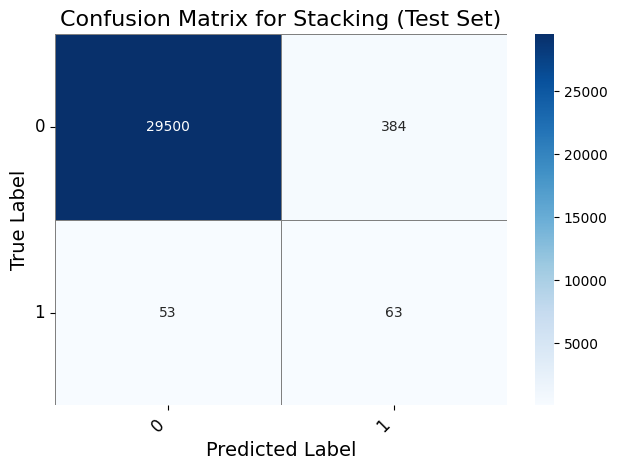

In [61]:
evaluator.plot_confusion_matrix(model_name='Stacking', dataset_name="Test")

#### XGBoost

In [62]:
y_testpred_xgb = xgb_model.predict(X_test)
y_testpred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
evaluator.evaluate_model(
    model_name="XGBoost",
    y_actual=y_test,
    y_pred=y_testpred_xgb,
    y_pred_prob=y_testpred_prob_xgb,
    dataset_name="Test"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
XGBoost,0.9774,0.080597,0.465517,0.137405,0.942277,0.115549


#### AdaBoost

In [63]:
y_testpred_adaboost = adaboost_model.predict(X_test)
y_testpred_prob_adaboost = adaboost_model.predict_proba(X_test)[:, 1]

evaluator.evaluate_model(
    model_name="AdaBoost",
    y_actual=y_test,
    y_pred=y_testpred_adaboost,
    y_pred_prob=y_testpred_prob_adaboost,
    dataset_name="Test"
)

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
AdaBoost,0.9734,0.072682,0.5,0.126915,0.937179,0.103674


### All Models on Test

In [64]:
evaluator.display_results(dataset_name="Test")

,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC,Average Precision
0,Baseline Model 1,0.499367,0.003796,0.491379,0.007533,0.500000,0.003867
1,Baseline Model 2,0.996133,0.000000,0.000000,0.000000,0.500000,0.003867
2,LogisticRegression,0.938600,0.016797,0.258621,0.031546,0.652491,0.034511
3,SGDClassifier,0.925433,0.014201,0.267241,0.026968,0.684051,0.038466
4,RidgeClassifier,0.922700,0.019625,0.387931,0.037360,0.748156,0.045072
5,KNeighborsClassifier,0.978300,0.065041,0.344828,0.109439,0.746198,0.038113
6,GaussianNB,0.949633,0.023891,0.301724,0.044276,0.610312,0.041765
7,DecisionTree,0.965533,0.033537,0.284483,0.060000,0.820868,0.053868
8,HistGB,0.985667,0.155702,0.612069,0.248252,0.952620,0.170116
9,RandomForest,0.964700,0.016410,0.137931,0.029331,0.912874,0.072671


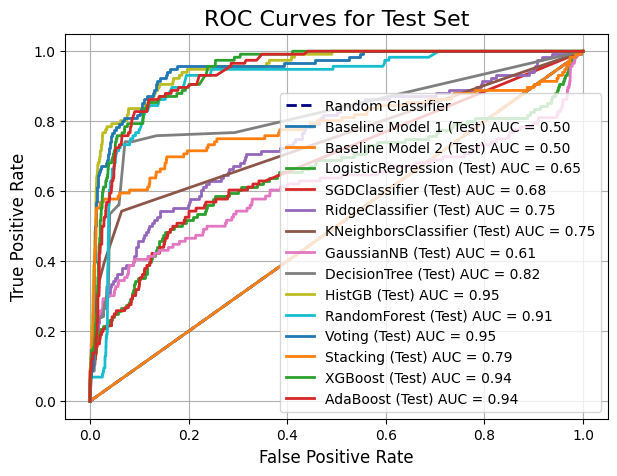

In [65]:
evaluator.plot_curves(curve_type='roc', dataset_name="Test")

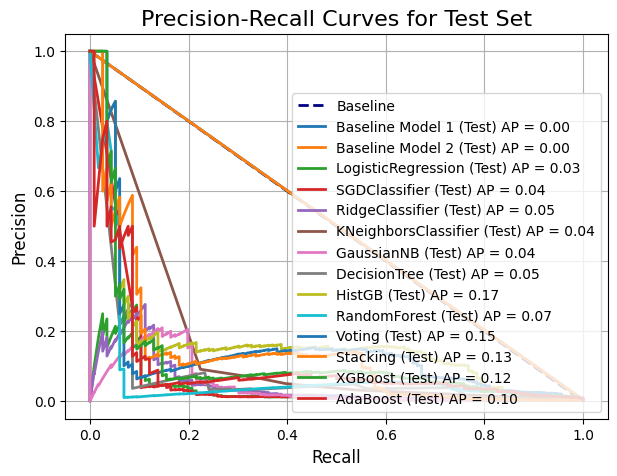

In [66]:
evaluator.plot_curves(curve_type='precision_recall', dataset_name="Test")